In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Import package and data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 79 features and 1 label (SalePrice) in our dataset

In [6]:
# 38 numerical columns
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# check for missing data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Check distribution of label (SalePrice)
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

No missing data for target label. Mean sale price = $180,921

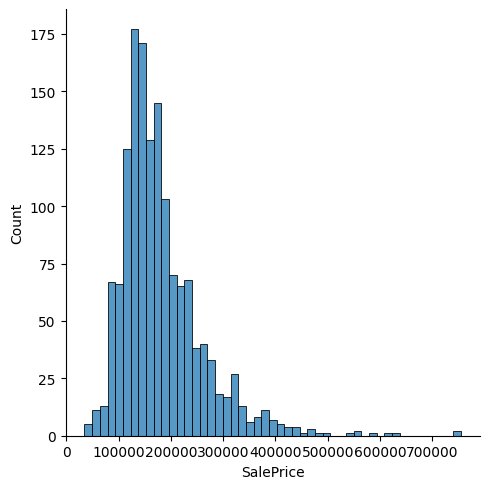

In [9]:
# data is right skewed
sns.displot(df_train.SalePrice)

<Axes: >

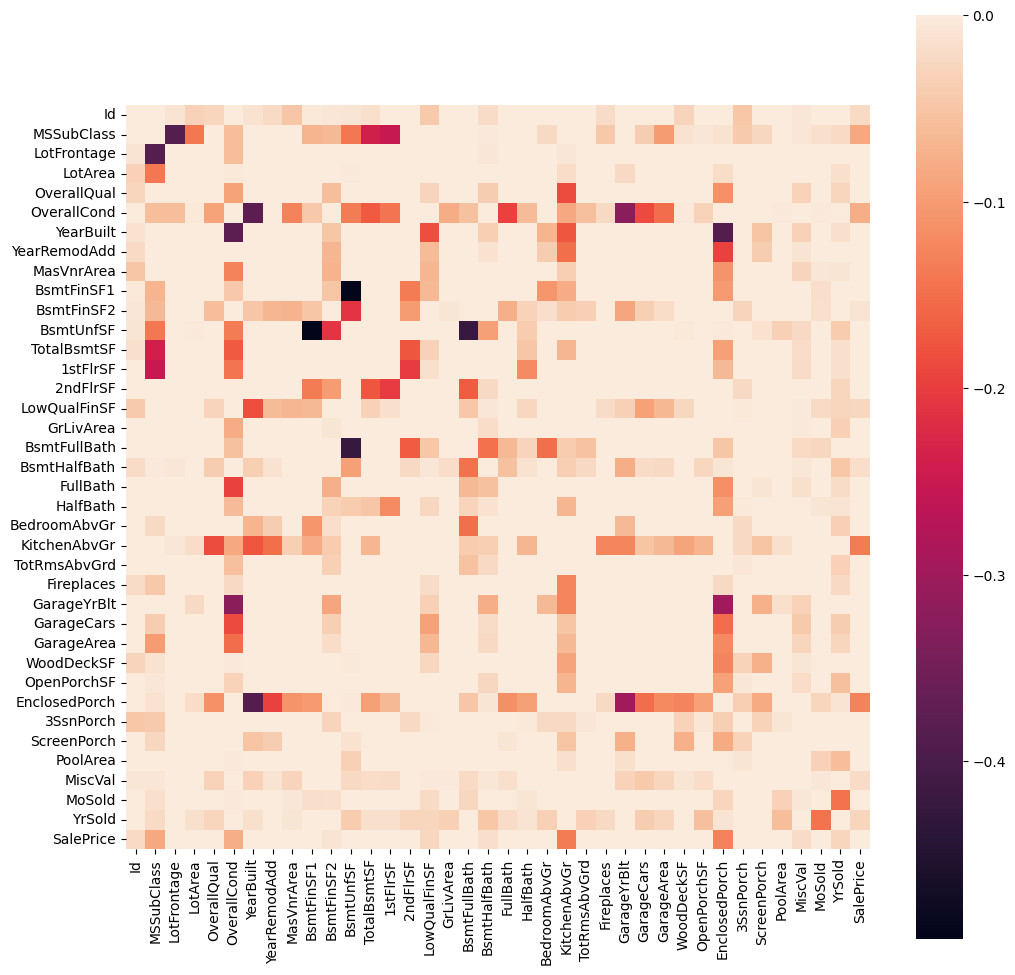

In [10]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_train.select_dtypes(include=['number']).corr(), vmax=0, square=True)

<Axes: >

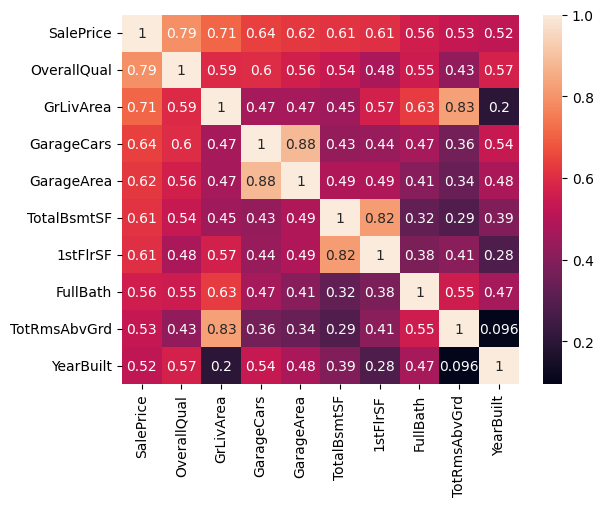

In [11]:
k = 10
cols = df_train.select_dtypes(include=['number']).corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

Top 10 features that have high correlation with SalePrice: OverallQual, GrLivArea, GarageCars,GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt.

These features are good enough for the model to train with.

# 2. Prepare data to train the model

In [12]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


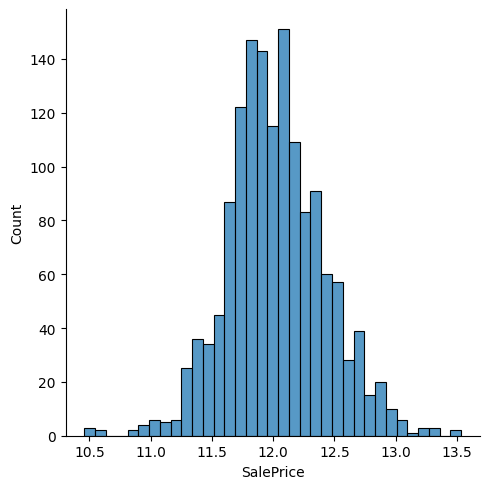

In [14]:
# fit sale price as close as possible to a normal distribution.
y_train = np.log1p(df_train.pop('SalePrice'))
sns.displot(y_train)

In [15]:
# group train and test sets together for feature processing
all_df = pd.concat([df_train, df_test], axis=0)
all_df.reset_index(inplace=True)
all_df

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [16]:
all_df.MSSubClass.value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

The values of the numbers themselves can impact the model. To avoid the numerical influence during classification, we do one-hot encoding using get_dummies method

In [17]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [18]:
all_df = pd.get_dummies(all_df)
all_df.shape

(2919, 289)

In [19]:
# identify missing values
all_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
GarageArea        1
GarageCars        1
BsmtUnfSF         1
BsmtFinSF2        1
dtype: int64

In [20]:
# replace missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

all_df = pd.DataFrame(imputer.fit_transform(all_df), columns=all_df.columns)

all_df.isnull().sum().sum()

0

In [21]:
numeric_cols = df_train.select_dtypes(include=['number']).columns

numeric_col_mean = all_df.loc[:, numeric_cols].mean()
numeric_col_std = all_df.loc[:, numeric_cols].std()
all_df.loc[:, numeric_cols] = (all_df.loc[:, numeric_cols] - numeric_col_mean) / numeric_col_std

# 3. Build model

In [22]:
dummy_train_df = all_df.loc[df_train.index]
dummy_test_df = all_df.loc[df_test.index]

dummy_train_df.drop(columns=['index'], inplace=True)
dummy_test_df.drop(columns=['index'], inplace=True)

dummy_train_df.shape, dummy_test_df.shape

((1460, 288), (1459, 288))

## Ridge Regression

In [23]:
# define a range of 50 different parameters for Ridge Regression, regularization strength = alpha
alphas = np.logspace(-3, 2, 50)
alphas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

Reminder: Evaluation metrics = RMSE

In [24]:
# cross validation using different alphas
X_train = dummy_train_df.values
X_test = dummy_test_df.values

test_scores=[]
cv_folds = 10

for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [25]:
min_error_index = np.argmin(test_scores)
min_error_index

42

In [26]:
# minimum cv error and corresponding alpha
alphas[min_error_index], test_scores[min_error_index]

(19.306977288832496, 0.13607812700814959)

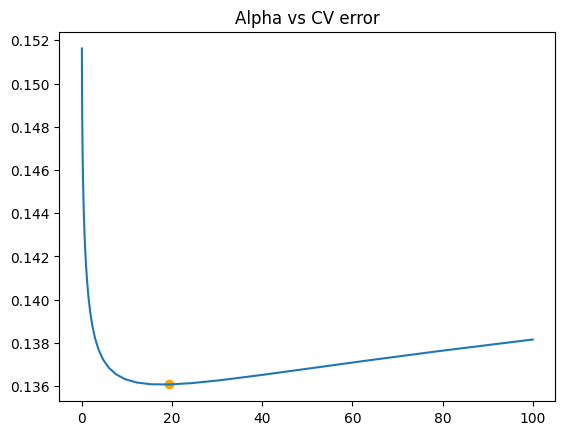

In [27]:
plt.scatter(alphas[min_error_index], 
            test_scores[min_error_index],
            color='orange',
            )
plt.plot(alphas, test_scores)
plt.title('Alpha vs CV error')
plt.show()

Lowest error (0.136) occurs at alpha = 19

## Random Forest

In [28]:
# use RFR instead of RFC
from sklearn.ensemble import RandomForestRegressor

Main parameters:

1. n_estimators: Number of trees in the forests. More trees generally lead to better performance (at the expense of computational cost). It is crucial to choose an appropriate number of trees to balance between accuracy and efficiency

2. max_features: Max number of features to be used at each split. Controls the randomness of feature selection. Smaller values lead to more randomness and more diverse trees, reducing overfitting. Larger values lead to less random and more correlated trees, potentially overfitting.

In [29]:
N_estimators = [20, 50, 100, 150, 200, 250, 300]
test_scores = []
max_features = int(np.sqrt(X_train.shape[1]))+1

for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features=max_features)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=cv_folds,
                                         scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [30]:
min_error_index = np.argmin(test_scores)
N_estimators[min_error_index], test_scores[min_error_index]

(300, 0.1437887093394993)

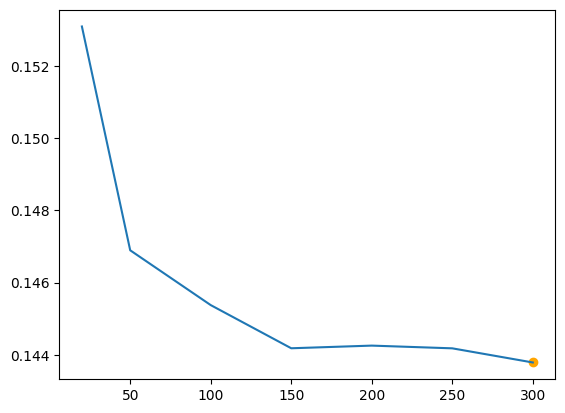

In [31]:
plt.scatter(N_estimators[min_error_index], test_scores[min_error_index], color='orange')
plt.plot(N_estimators, test_scores)

Optimal no of estimators = 150, with lowest score = 0.143 (slightly higher than Ridge Regression)

## Ensemble

Combining ridge regression and random forest regressor to form an ensemble model

In [32]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=150, max_features=max_features)

ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=17, n_estimators=150)

In [33]:
ridge_predict = ridge.predict(X_test)
ridge_test_score = ridge.score(X_train, y_train)
print(ridge_test_score)

rf_predict = rf.predict(X_test)
rf_test_score = rf.score(X_train, y_train)
print(rf_test_score)

# convert log values back
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)

0.9191646266957372
0.9816194869225836


While random forest test score = 0.98 is better than ridge test score = 0.92, there is a chance that random forest model is overfitting.

In [34]:
y_ridge, y_rf

(array([210377.45792476, 196560.11141597, 218832.57316081, ...,
        202753.55943997, 245638.28477862, 147396.63051224]),
 array([209400.52564904, 176736.66999746, 222636.05723391, ...,
        203728.76968389, 241724.91907088, 137302.71627727]))

In [35]:
# creating the ensemble model
y_final = (y_ridge+y_rf)/2
y_final

array([209888.9917869 , 186648.39070671, 220734.31519736, ...,
       203241.16456193, 243681.60192475, 142349.67339475])

In [36]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score

ensemble = VotingRegressor(estimators=[('ridge', ridge),
                                      ('random_forest', rf)])

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_train)

ensemble_score = r2_score(y_train, y_pred)
ensemble_score

0.9613410807690899

Despite the Random Forest model yielding a slightly higher score (0.98), opting for the ensemble score (0.96) can enhance generalization and robustness due to its ability to mitigate overfitting and capture complex data relationships from multiple models.

In [37]:
y_ensemble = np.expm1(y_pred)
y_ensemble

array([210200.84147397, 187136.29262667, 220373.75605495, ...,
       246003.23392946, 143307.95310573, 145527.21002481])